# Explore here - Problem Statement | Background

## Sales forecasting system

We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.




### Import libraries

In [3]:
import pandas as pd


from pickle import dump


### Step 1: Loading the dataset from CSV File

In [7]:
#import csv movie file
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

# Set display options to show all columns (None means unlimited)
pd.set_option('display.max_columns', None)

#Read csv file and display intial rows
total_data.head(5)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


### Step 2: Construct and analyze the time series

Construct the valid data structure for the time serie, graph it, and then analyze it and answer the following questions:

Which is the tensor of the time serie?
- Which is the trend?
- Is it stationary?
- Is there variability or noise?

NOTE: A tensor in a time series is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month... (daily)

In [8]:
import pandas as pd

# Assuming `total_data` is your DataFrame containing the dataset.
total_data['date'] = pd.to_datetime(total_data['date'])  # Convert 'date' column to datetime
total_data = total_data.set_index('date')  # Set the 'date' column as the index

# Optional: Normalize the index to remove the time part, considering each entry as representing a day
total_data.index = total_data.index.normalize()

# Keep the series named as 'ts' for the 'sales' data
ts = total_data['sales']

ts.head()

date
2022-09-03    55.292157
2022-09-04    53.803211
2022-09-05    58.141693
2022-09-06    64.530899
2022-09-07    66.013633
Freq: D, Name: sales, dtype: float64

In [12]:
ts.shape

(366,)

Visualize the Series

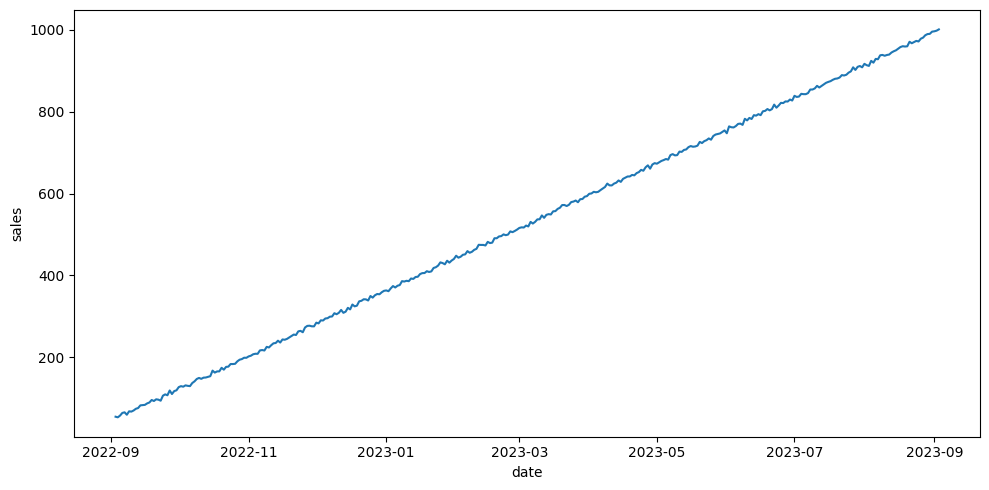

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 7)
decomposition

Decomposition of the Series


#### Trend analysis


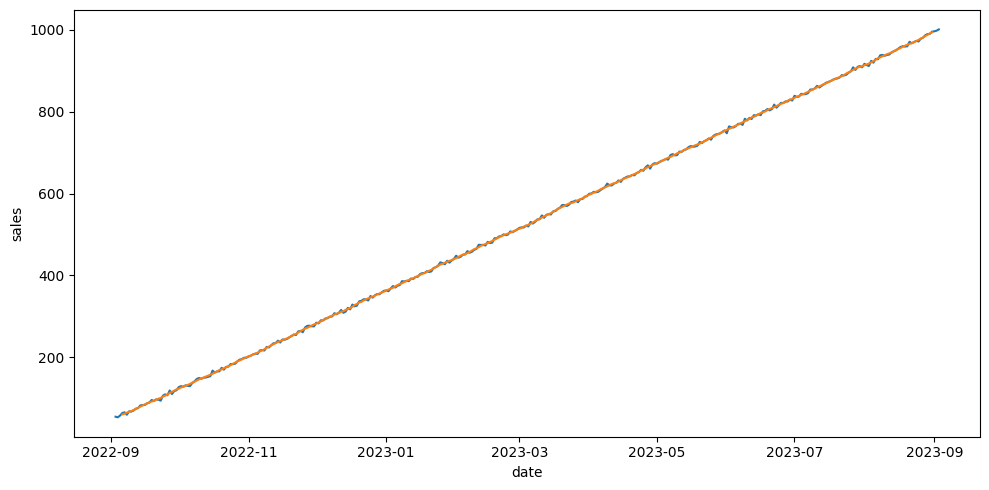

In [20]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

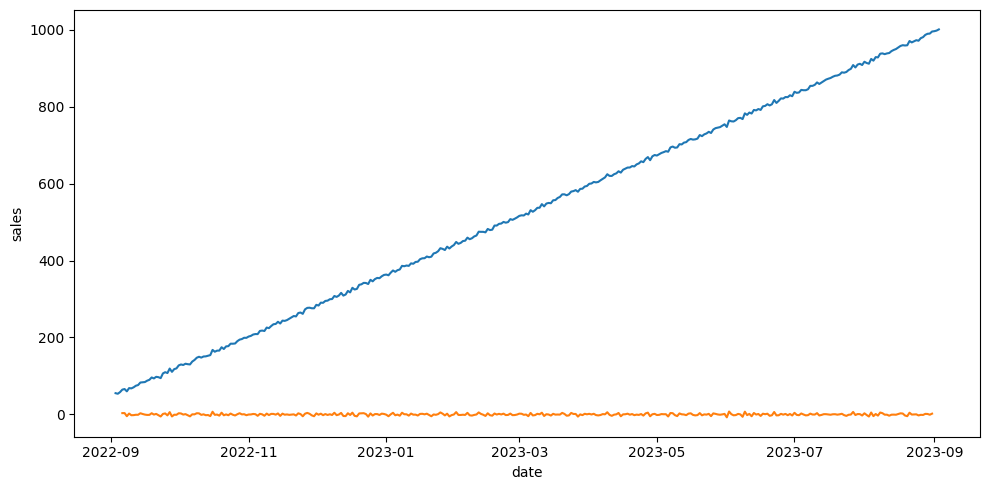

In [22]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

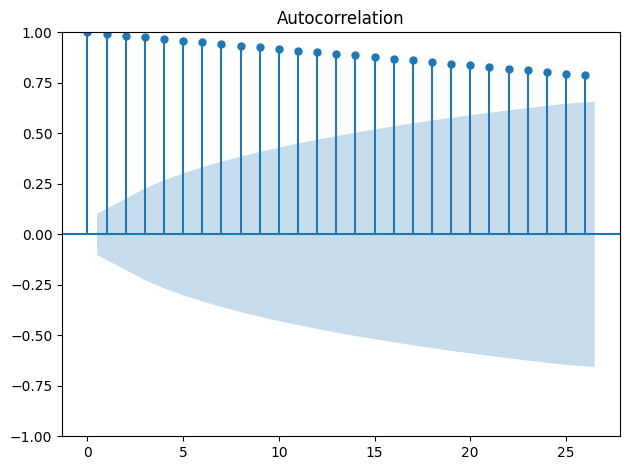

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)
plt.tight_layout()
plt.show()

### Step 3: Train an ARIMA

In [24]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [31]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = False, trace = True, m = 7)


/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1854.775, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2205.881, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2208.143, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1862.229, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1843.049, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1843.587, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1841.533, Time=0.56 sec
 A

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(3, 0, 1)x(1, 0, [], 7)   Log Likelihood                -911.986
Date:                            Tue, 30 Jan 2024   AIC                           1837.972
Time:                                    01:20:18   BIC                           1865.271
Sample:                                09-04-2022   HQIC                          1848.821
                                     - 09-03-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1216      0.290      7.315      0.000       1.553       2.690
ar.L1         -0.0774      0.054     -1.427      0.154      -0.184       0.029
ar.L2          0.0470      0.060      0.781      0.435      -0.071       0.165
ar.L3          0.0724      0.057      1.276      0.202      -0.039       0.184
ma.L1         -0.9787      0.020    -49.880      0.000      -1.017      -0.940
ar.S.L7        0.1481      0.055      2.707      0.007       0.041       0.255
sigma2         8.8359      0.714     12.377      0.000       7.437      10.235
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.61   Prob(JB):                         0.79
Heteroskedasticity (H):               0.86   Skew:                             0.06
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
forecast = model.predict(30)
forecast

2023-09-04    2.097971
2023-09-05    2.615429
2023-09-06    2.284769
2023-09-07    2.940115
2023-09-08    2.340791
2023-09-09    2.437700
2023-09-10    2.673627
2023-09-11    2.525567
2023-09-12    2.601195
2023-09-13    2.552504
2023-09-14    2.649867
2023-09-15    2.561022
2023-09-16    2.575416
2023-09-17    2.610372
2023-09-18    2.588439
2023-09-19    2.599643
2023-09-20    2.592433
2023-09-21    2.606852
2023-09-22    2.593694
2023-09-23    2.595826
2023-09-24    2.601003
2023-09-25    2.597755
2023-09-26    2.599414
2023-09-27    2.598346
2023-09-28    2.600482
2023-09-29    2.598533
2023-09-30    2.598849
2023-10-01    2.599616
2023-10-02    2.599135
2023-10-03    2.599380
Freq: D, dtype: float64

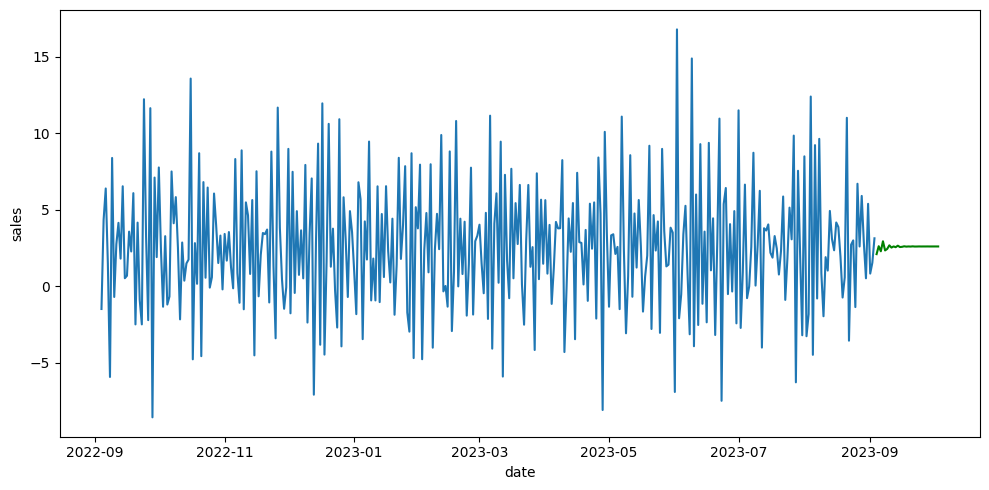

In [29]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()